In [1]:
from pylab import *
%matplotlib inline

In [2]:
def rk4(ec,p_ini,x,args=0,h=0.01): #Runge Kutta de segundo orden
    tiempos=arange(x[0],x[1]+h,h)
    sol=zeros((len(tiempos),len(p_ini)))
    sol[0,:]=p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1=ec(sol[i,:],tiempos[i])
            k2=ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3=ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4=ec(sol[i,:]+h*k3,tiempos[i]+h)
        #evaluando en el i-esimo
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4) #cero no esta involucrado, esta en cuenta en p_ini
    else:
        for i in xrange(len(tiempos)-1):
            k1=ec(sol[i,:],tiempos[i],args)
            k2=ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3=ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4=ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

In [3]:
def mov(xp_xs,t,a_b=[0,0]): #ecuaciones de movimiento, a y b relacionados con las masas de los cuerpos
    rp=sqrt(xp_xs[0]**2+xp_xs[1]**2)
    rs=sqrt(xp_xs[4]**2+xp_xs[5]**2)
    dif_xp_xs=xp_xs[0:2]-xp_xs[4:6] #diferencia entre xp y xs
    dist_xp_xs=sqrt(dif_xp_xs[0]**2+dif_xp_xs[1]**2) #distancias
    dxp,dyp=xp_xs[2],xp_xs[3] # derivadas vxp, vyp
    dvxp=-xp_xs[0]/(rp**3)-a_b[0]*dif_xp_xs[0]/(dist_xp_xs**3) #velocidad en p
    dvyp=-xp_xs[1]/(rp**3)-a_b[0]*dif_xp_xs[1]/(dist_xp_xs**3)
    dxs,dys=xp_xs[6],xp_xs[7] # derivadas vxs, vys
    dvxs=-xp_xs[4]/(rs**3)+a_b[1]*dif_xp_xs[0]/(dist_xp_xs**3) #velocidad en s
    dvys=-xp_xs[5]/(rs**3)+a_b[1]*dif_xp_xs[1]/(dist_xp_xs**3)
    return array([dxp,dyp,dvxp,dvyp,dxs,dys,dvxs,dvys])

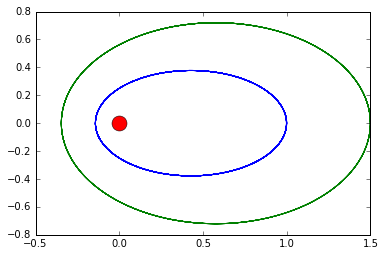

In [4]:
#integrando la ec. mov
p_ini=[1,0,0,0.5,1.5,0,0,0.5] #condiciones iniciales 
t,r=rk4(mov,p_ini,[0,10*pi]) #a=0, b=.1
plot(r[:,0],r[:,1],r[:,4],r[:,5]) #grafica de xp,yp,xs,ys
plot([0],[0],'o',color='red',markersize=15) #Sol
show()

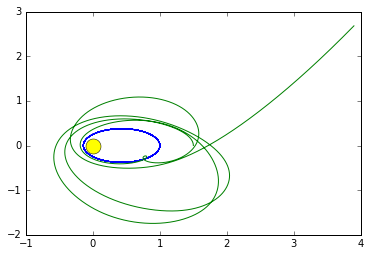

In [5]:
#integrando la ec. mov
p_ini=[1,0,0,0.5,1.5,0,0,0.5] #condiciones iniciales 
t,r=rk4(mov,p_ini,[0,10*pi],[0,.1],0.001) #a=0, b=.1
plot(r[:,0],r[:,1],r[:,4],r[:,5]) #grafica de xp,yp,xs,ys
plot([0],[0],'o',color='yellow',markersize=15) #Sol
show()

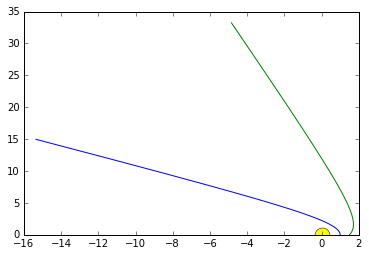

In [6]:
#integrando la ec. mov
p_ini=[1,0,0,1.5,1.5,0,0.5,1.5] #condiciones iniciales 
t,r=rk4(mov,p_ini,[0,10*pi],[0,.1],0.001) #a=0, b=.1
plot(r[:,0],r[:,1],r[:,4],r[:,5]) #grafica de xp,yp,xs,ys
plot([0],[0],'o',color='yellow',markersize=15) #Sol
show()

In [7]:
#pasando args al integrador


In [8]:
# en vex de array
a=array([1,2,3,4,50,6,7,8,])
a[0:2]-a[3:5]

array([ -3, -48])